In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier


from sklearn. naive_bayes import GaussianNB
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split,cross_val_score
import joblib
import warnings
warnings.filterwarnings('ignore')

In [2]:
ds=pd.read_csv("Data file.csv",parse_dates=['pdate'])

In [3]:
ds.head()

Unnamed: 0  label       msisdn    aon  daily_decr30  daily_decr90  \
0           1      0  21408I70789  272.0   3055.050000   3065.150000   
1           2      1  76462I70374  712.0  12122.000000  12124.750000   
2           3      1  17943I70372  535.0   1398.000000   1398.000000   
3           4      1  55773I70781  241.0     21.228000     21.228000   
4           5      1  03813I82730  947.0    150.619333    150.619333   

   rental30  rental90  last_rech_date_ma  last_rech_date_da  ...  \
0    220.13    260.13                2.0                0.0  ...   
1   3691.26   3691.26               20.0                0.0  ...   
2    900.13    900.13                3.0                0.0  ...   
3    159.42    159.42               41.0                0.0  ...   
4   1098.90   1098.90                4.0                0.0  ...   

   maxamnt_loans30  medianamnt_loans30  cnt_loans90  amnt_loans90  \
0              6.0                 0.0          2.0            12   
1             12.0                 0.0          1.0            12   
2              6.0                 0.0          1.0             6   
3              6.0                 0.0          2.0            12   
4              6.0                 0.0          7.0            42   

   maxamnt_loans90  medianamnt_loans90  payback30  payback90  pcircle  \
0                6                 0.0  29.000000  29.000000      UPW   
1               12                 0.0   0.000000   0.000000      UPW   
2                6                 0.0   0.000000   0.000000      UPW   
3                6                 0.0   0.000000   0.000000      UPW   
4                6                 0.0   2.333333   2.333333      UPW   

       pdate  
0 2016-07-20  
1 2016-08-10  
2 2016-08-19  
3 2016-06-06  
4 2016-06-22  

[5 rows x 37 columns]

In [4]:
ds.shape

(209593, 37)

In this dataset there are 209593 rows and 37 columns present.

In [5]:
ds.drop('Unnamed: 0',axis=1,inplace=True)

there is no need of this column..so just drop it

In [6]:
ds.columns

Index(['label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90', 'rental30',
       'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

In [7]:
ds.head()

label       msisdn    aon  daily_decr30  daily_decr90  rental30  rental90  \
0      0  21408I70789  272.0   3055.050000   3065.150000    220.13    260.13   
1      1  76462I70374  712.0  12122.000000  12124.750000   3691.26   3691.26   
2      1  17943I70372  535.0   1398.000000   1398.000000    900.13    900.13   
3      1  55773I70781  241.0     21.228000     21.228000    159.42    159.42   
4      1  03813I82730  947.0    150.619333    150.619333   1098.90   1098.90   

   last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  ...  \
0                2.0                0.0              1539  ...   
1               20.0                0.0              5787  ...   
2                3.0                0.0              1539  ...   
3               41.0                0.0               947  ...   
4                4.0                0.0              2309  ...   

   maxamnt_loans30  medianamnt_loans30  cnt_loans90  amnt_loans90  \
0              6.0                 0.0          2.0            12   
1             12.0                 0.0          1.0            12   
2              6.0                 0.0          1.0             6   
3              6.0                 0.0          2.0            12   
4              6.0                 0.0          7.0            42   

   maxamnt_loans90  medianamnt_loans90  payback30  payback90  pcircle  \
0                6                 0.0  29.000000  29.000000      UPW   
1               12                 0.0   0.000000   0.000000      UPW   
2                6                 0.0   0.000000   0.000000      UPW   
3                6                 0.0   0.000000   0.000000      UPW   
4                6                 0.0   2.333333   2.333333      UPW   

       pdate  
0 2016-07-20  
1 2016-08-10  
2 2016-08-19  
3 2016-06-06  
4 2016-06-22  

[5 rows x 36 columns]

By dropping one column there are 36 columns presen in dataset.

In [8]:
df=pd.DataFrame(ds)

In [9]:
df.head()

label       msisdn    aon  daily_decr30  daily_decr90  rental30  rental90  \
0      0  21408I70789  272.0   3055.050000   3065.150000    220.13    260.13   
1      1  76462I70374  712.0  12122.000000  12124.750000   3691.26   3691.26   
2      1  17943I70372  535.0   1398.000000   1398.000000    900.13    900.13   
3      1  55773I70781  241.0     21.228000     21.228000    159.42    159.42   
4      1  03813I82730  947.0    150.619333    150.619333   1098.90   1098.90   

   last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  ...  \
0                2.0                0.0              1539  ...   
1               20.0                0.0              5787  ...   
2                3.0                0.0              1539  ...   
3               41.0                0.0               947  ...   
4                4.0                0.0              2309  ...   

   maxamnt_loans30  medianamnt_loans30  cnt_loans90  amnt_loans90  \
0              6.0                 0.0          2.0            12   
1             12.0                 0.0          1.0            12   
2              6.0                 0.0          1.0             6   
3              6.0                 0.0          2.0            12   
4              6.0                 0.0          7.0            42   

   maxamnt_loans90  medianamnt_loans90  payback30  payback90  pcircle  \
0                6                 0.0  29.000000  29.000000      UPW   
1               12                 0.0   0.000000   0.000000      UPW   
2                6                 0.0   0.000000   0.000000      UPW   
3                6                 0.0   0.000000   0.000000      UPW   
4                6                 0.0   2.333333   2.333333      UPW   

       pdate  
0 2016-07-20  
1 2016-08-10  
2 2016-08-19  
3 2016-06-06  
4 2016-06-22  

[5 rows x 36 columns]

passed the dataset to pandas DataFrame so we can perfom operations on dataset

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 36 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   label                 209593 non-null  int64         
 1   msisdn                209593 non-null  object        
 2   aon                   209593 non-null  float64       
 3   daily_decr30          209593 non-null  float64       
 4   daily_decr90          209593 non-null  float64       
 5   rental30              209593 non-null  float64       
 6   rental90              209593 non-null  float64       
 7   last_rech_date_ma     209593 non-null  float64       
 8   last_rech_date_da     209593 non-null  float64       
 9   last_rech_amt_ma      209593 non-null  int64         
 10  cnt_ma_rech30         209593 non-null  int64         
 11  fr_ma_rech30          209593 non-null  float64       
 12  sumamnt_ma_rech30     209593 non-null  float64       
 13 

dataset contains 209593 rows which have not null values and some values are float type and some values are int type.

In [11]:
df.dtypes

label                            int64
msisdn                          object
aon                            float64
daily_decr30                   float64
daily_decr90                   float64
rental30                       float64
rental90                       float64
last_rech_date_ma              float64
last_rech_date_da              float64
last_rech_amt_ma                 int64
cnt_ma_rech30                    int64
fr_ma_rech30                   float64
sumamnt_ma_rech30              float64
medianamnt_ma_rech30           float64
medianmarechprebal30           float64
cnt_ma_rech90                    int64
fr_ma_rech90                     int64
sumamnt_ma_rech90                int64
medianamnt_ma_rech90           float64
medianmarechprebal90           float64
cnt_da_rech30                  float64
fr_da_rech30                   float64
cnt_da_rech90                    int64
fr_da_rech90                     int64
cnt_loans30                      int64
amnt_loans30             

In [12]:
df.describe()

label            aon   daily_decr30   daily_decr90  \
count  209593.000000  209593.000000  209593.000000  209593.000000   
mean        0.875177    8112.343445    5381.402289    6082.515068   
std         0.330519   75696.082531    9220.623400   10918.812767   
min         0.000000     -48.000000     -93.012667     -93.012667   
25%         1.000000     246.000000      42.440000      42.692000   
50%         1.000000     527.000000    1469.175667    1500.000000   
75%         1.000000     982.000000    7244.000000    7802.790000   
max         1.000000  999860.755168  265926.000000  320630.000000   

            rental30       rental90  last_rech_date_ma  last_rech_date_da  \
count  209593.000000  209593.000000      209593.000000      209593.000000   
mean     2692.581910    3483.406534        3755.847800        3712.202921   
std      4308.586781    5770.461279       53905.892230       53374.833430   
min    -23737.140000  -24720.580000         -29.000000         -29.000000   
25%       280.420000     300.260000           1.000000           0.000000   
50%      1083.570000    1334.000000           3.000000           0.000000   
75%      3356.940000    4201.790000           7.000000           0.000000   
max    198926.110000  200148.110000      998650.377733      999171.809410   

       last_rech_amt_ma  cnt_ma_rech30  ...    cnt_loans30   amnt_loans30  \
count     209593.000000  209593.000000  ...  209593.000000  209593.000000   
mean        2064.452797       3.978057  ...       2.758981      17.952021   
std         2370.786034       4.256090  ...       2.554502      17.379741   
min            0.000000       0.000000  ...       0.000000       0.000000   
25%          770.000000       1.000000  ...       1.000000       6.000000   
50%         1539.000000       3.000000  ...       2.000000      12.000000   
75%         2309.000000       5.000000  ...       4.000000      24.000000   
max        55000.000000     203.000000  ...      50.000000     306.000000   

       maxamnt_loans30  medianamnt_loans30    cnt_loans90   amnt_loans90  \
count    209593.000000       209593.000000  209593.000000  209593.000000   
mean        274.658747            0.054029      18.520919      23.645398   
std        4245.264648            0.218039     224.797423      26.469861   
min           0.000000            0.000000       0.000000       0.000000   
25%           6.000000            0.000000       1.000000       6.000000   
50%           6.000000            0.000000       2.000000      12.000000   
75%           6.000000            0.000000       5.000000      30.000000   
max       99864.560864            3.000000    4997.517944     438.000000   

       maxamnt_loans90  medianamnt_loans90      payback30      payback90  
count    209593.000000       209593.000000  209593.000000  209593.000000  
mean          6.703134            0.046077       3.398826       4.321485  
std           2.103864            0.200692       8.813729      10.308108  
min           0.000000            0.000000       0.000000       0.000000  
25%           6.000000            0.000000       0.000000       0.000000  
50%           6.000000            0.000000       0.000000       1.666667  
75%           6.000000            0.000000       3.750000       4.500000  
max          12.000000            3.000000     171.500000     171.500000  

[8 rows x 33 columns]

--count gives total number values..so there are no null values in the dataset
---there is huge difference between mean and median(50%) so there is skewness present in the  dataset
---standard devation is also very high so there is spread of data
-----there is difference between 75% and max ,it means there are outliers present

In [13]:
ds['label'].value_counts()

1    183431
0     26162
Name: label, dtype: int64

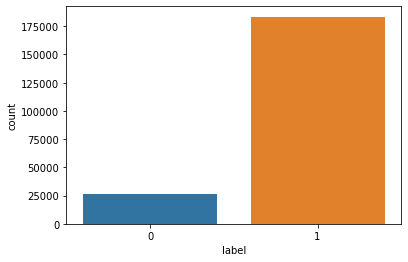

In [14]:
sns.countplot(x='label',data=df)
plt.show()

data have class imbalance problem

In [15]:
ds.isnull().sum()

label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

there are no null values.

<AxesSubplot:>

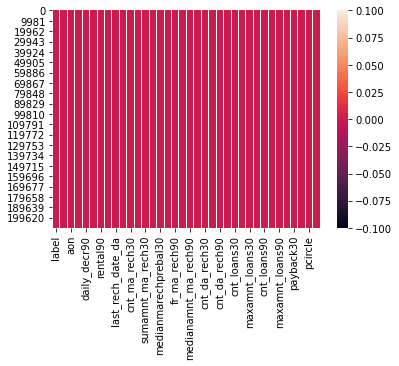

In [16]:
sns.heatmap(df.isnull())

In [17]:
df.corr()

label       aon  daily_decr30  daily_decr90  \
label                 1.000000 -0.003785      0.168298      0.166150   
aon                  -0.003785  1.000000      0.001104      0.000374   
daily_decr30          0.168298  0.001104      1.000000      0.977704   
daily_decr90          0.166150  0.000374      0.977704      1.000000   
rental30              0.058085 -0.000960      0.442066      0.434685   
rental90              0.075521 -0.000790      0.458977      0.471730   
last_rech_date_ma     0.003728  0.001692      0.000487      0.000908   
last_rech_date_da     0.001711 -0.001693     -0.001636     -0.001886   
last_rech_amt_ma      0.131804  0.004256      0.275837      0.264131   
cnt_ma_rech30         0.237331 -0.003148      0.451385      0.426707   
fr_ma_rech30          0.001330 -0.001163     -0.000577     -0.000343   
sumamnt_ma_rech30     0.202828  0.000707      0.636536      0.603886   
medianamnt_ma_rech30  0.141490  0.004306      0.295356      0.282960   
medianmarechprebal30 -0.004829  0.003930     -0.001153     -0.000746   
cnt_ma_rech90         0.236392 -0.002725      0.587338      0.593069   
fr_ma_rech90          0.084385  0.004401     -0.078299     -0.079530   
sumamnt_ma_rech90     0.205793  0.001011      0.762981      0.768817   
medianamnt_ma_rech90  0.120855  0.004909      0.257847      0.250518   
medianmarechprebal90  0.039300 -0.000859      0.037495      0.036382   
cnt_da_rech30         0.003827  0.001564      0.000700      0.000661   
fr_da_rech30         -0.000027  0.000892     -0.001499     -0.001570   
cnt_da_rech90         0.002999  0.001121      0.038814      0.031155   
fr_da_rech90         -0.005418  0.005395      0.020673      0.016437   
cnt_loans30           0.196283 -0.001826      0.366116      0.340387   
amnt_loans30          0.197272 -0.001726      0.471492      0.447869   
maxamnt_loans30       0.000248 -0.002764     -0.000028      0.000025   
medianamnt_loans30    0.044589  0.004664     -0.011610     -0.005591   
cnt_loans90           0.004733 -0.000611      0.008962      0.009446   
amnt_loans90          0.199788 -0.002319      0.563496      0.567204   
maxamnt_loans90       0.084144 -0.001191      0.400199      0.397251   
medianamnt_loans90    0.035747  0.002771     -0.037305     -0.034686   
payback30             0.048336  0.001940      0.026915      0.019400   
payback90             0.049183  0.002203      0.047175      0.040800   

                      rental30  rental90  last_rech_date_ma  \
label                 0.058085  0.075521           0.003728   
aon                  -0.000960 -0.000790           0.001692   
daily_decr30          0.442066  0.458977           0.000487   
daily_decr90          0.434685  0.471730           0.000908   
rental30              1.000000  0.955237          -0.001095   
rental90              0.955237  1.000000          -0.001688   
last_rech_date_ma    -0.001095 -0.001688           1.000000   
last_rech_date_da     0.003261  0.002794           0.001790   
last_rech_amt_ma      0.127271  0.121416          -0.000147   
cnt_ma_rech30         0.233343  0.230260           0.004311   
fr_ma_rech30         -0.001219 -0.000503          -0.001629   
sumamnt_ma_rech30     0.272649  0.259709           0.002105   
medianamnt_ma_rech30  0.129853  0.120242          -0.001358   
medianmarechprebal30 -0.001415 -0.001237           0.004071   
cnt_ma_rech90         0.312118  0.345293           0.004263   
fr_ma_rech90         -0.033530 -0.036524           0.001414   
sumamnt_ma_rech90     0.342306  0.360601           0.002243   
medianamnt_ma_rech90  0.110356  0.103151          -0.000726   
medianmarechprebal90  0.027170  0.029547          -0.001086   
cnt_da_rech30        -0.001105 -0.000548          -0.003467   
fr_da_rech30         -0.002558 -0.002345          -0.003626   
cnt_da_rech90         0.072255  0.056282          -0.003538   
fr_da_rech90          0.046761  0.036886          -0.002395   
cnt_loans30           0.180203  0.171595           0.001193   
a

<AxesSubplot:>

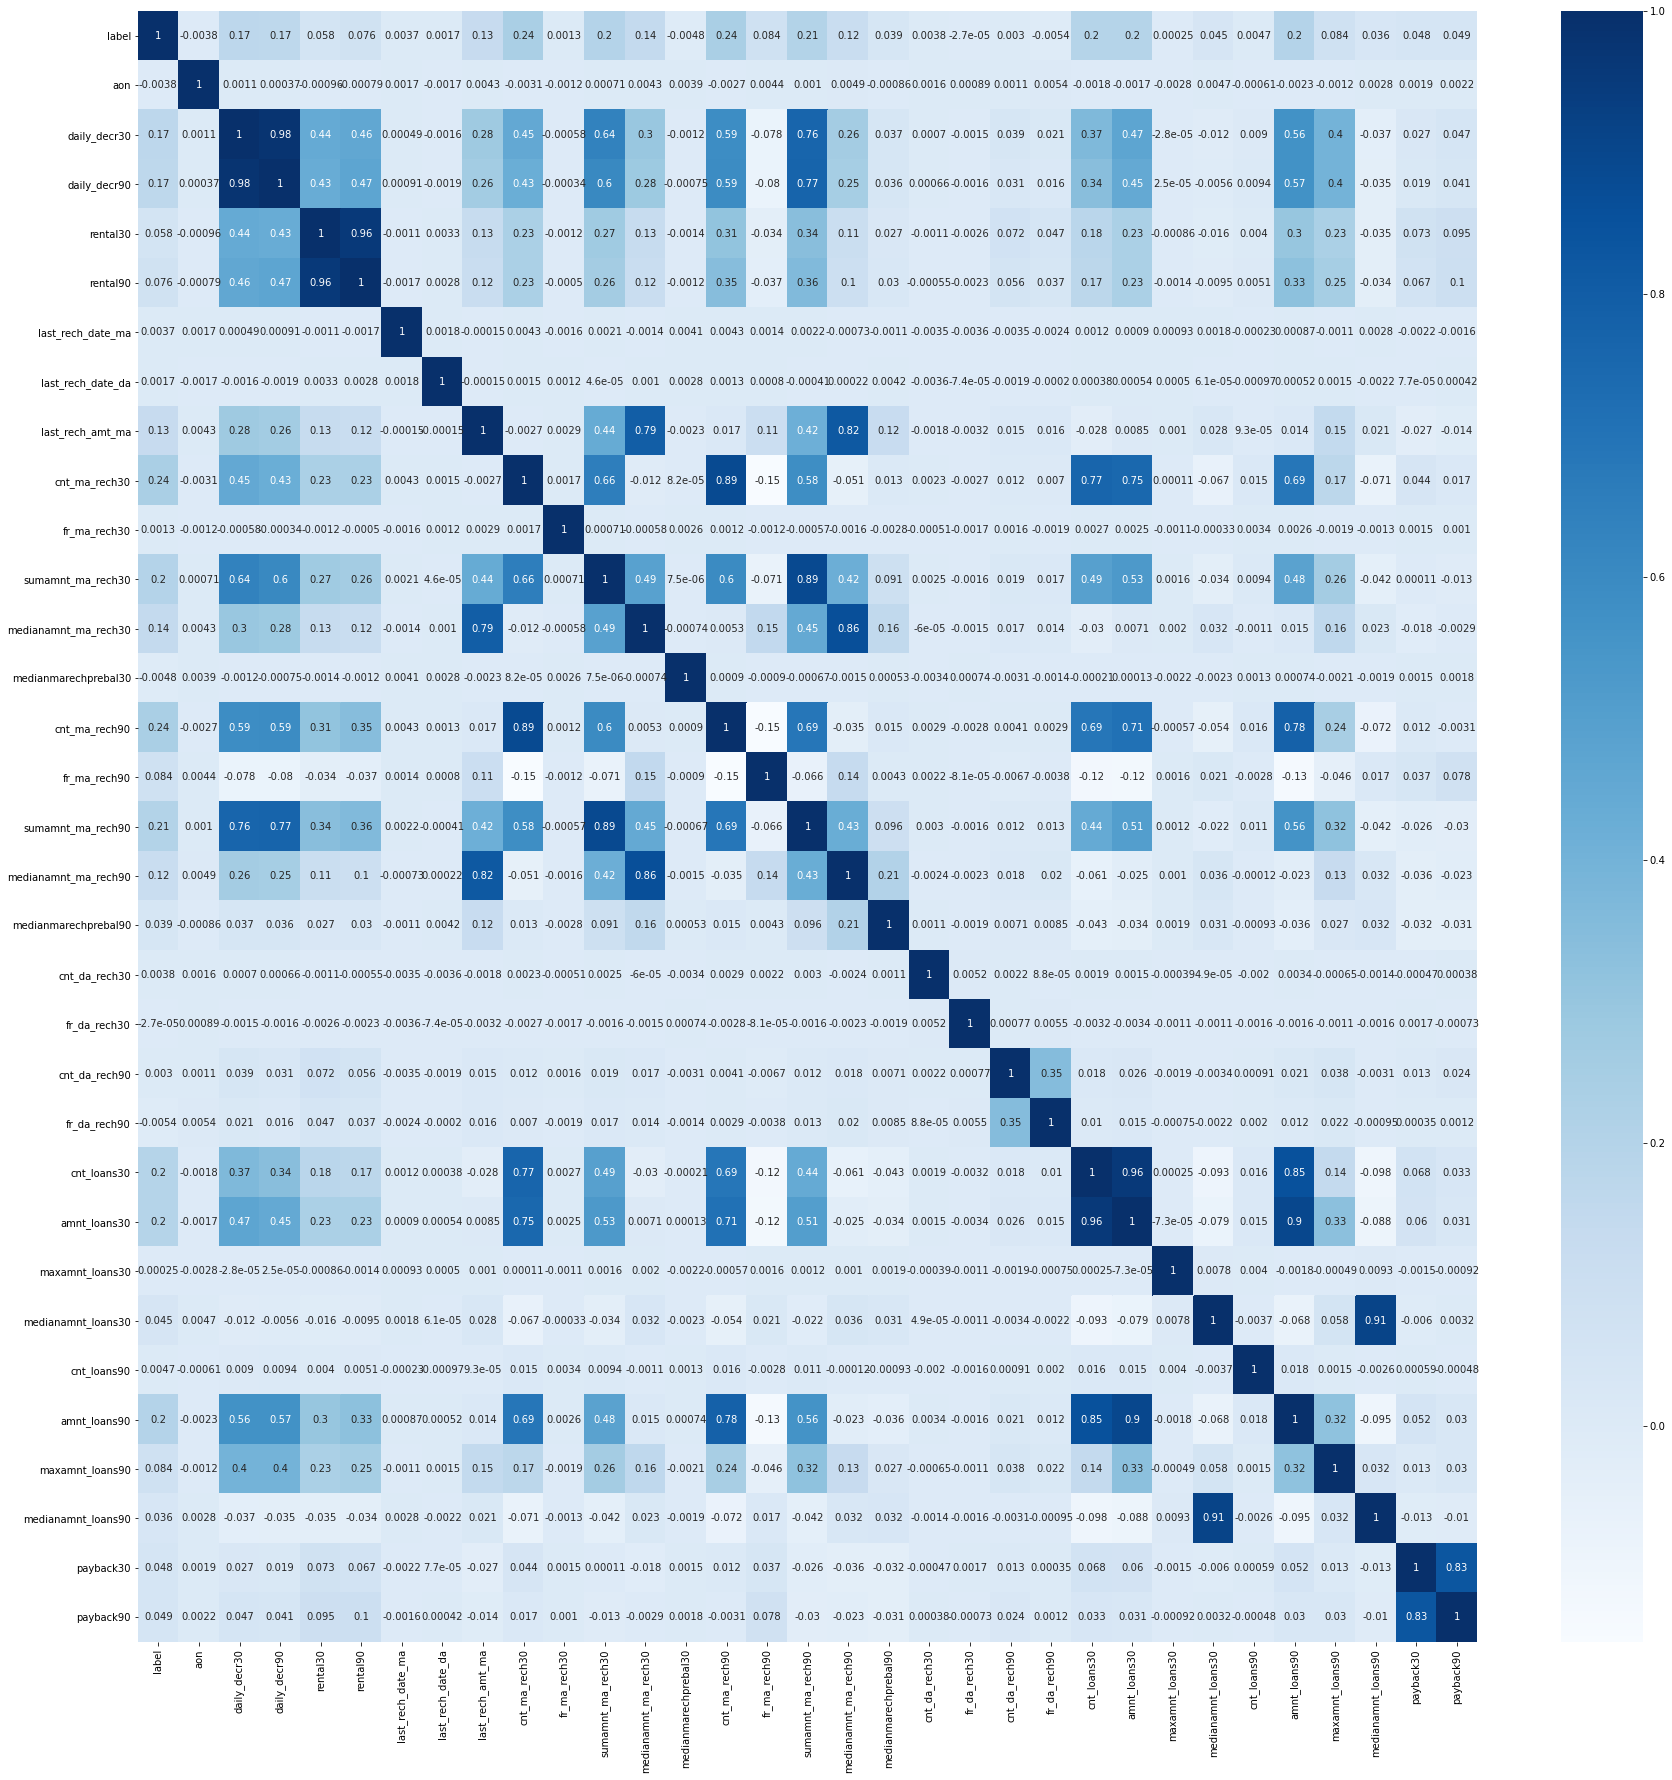

In [18]:
fig=plt.figure(figsize=(30,30))
hc=df.corr(method='pearson')
sns.heatmap(hc,annot=True,cmap='Blues')

---- above heatmap clearly shows the correlation between columns
-----ligheter shades indicates negative correlation
------darker shade indicates positive correlation


In [19]:
df.columns

Index(['label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90', 'rental30',
       'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

<AxesSubplot:>

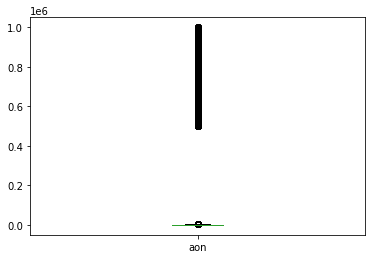

In [20]:
df['aon'].plot.box()

there are number of outliers present in 'aon' column

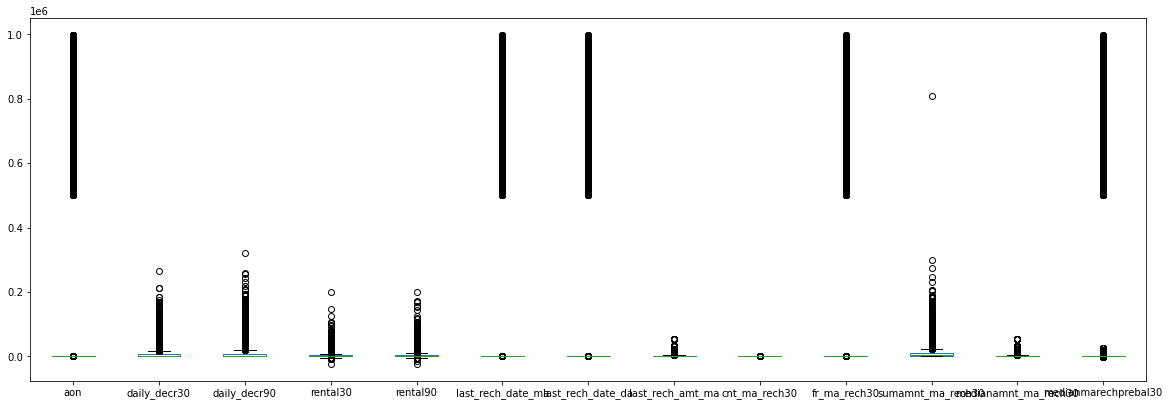

In [21]:
df.iloc[:,2:15].plot(kind='box',figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

In [22]:
c1= ['aon', 'daily_decr30', 'daily_decr90', 'rental30',
       'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90']

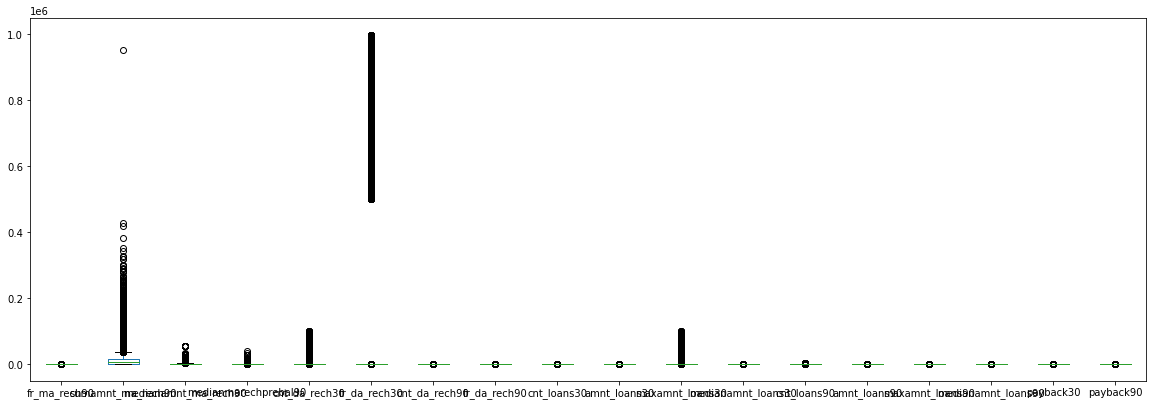

In [23]:

df.iloc[:,16:].plot(kind='box',figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

there are many outliers present in every column,so we have to remove it


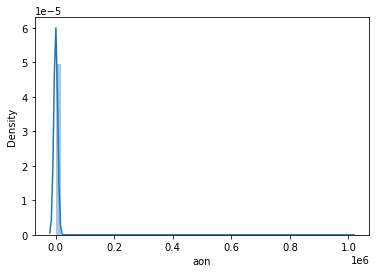

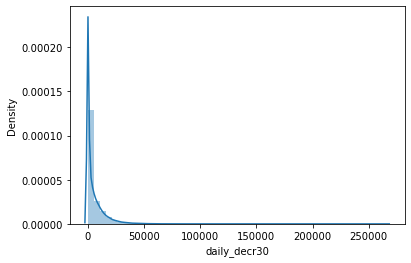

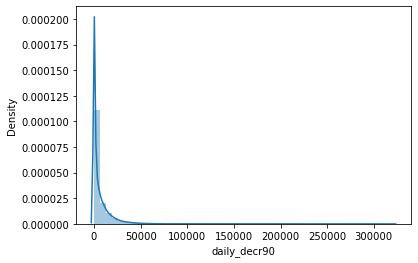

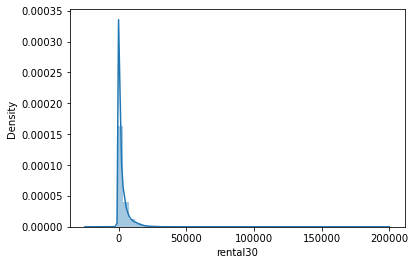

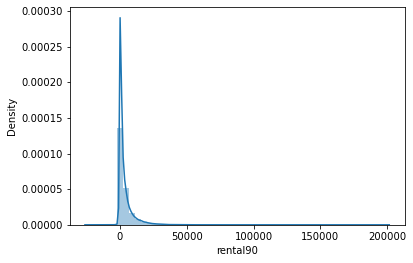

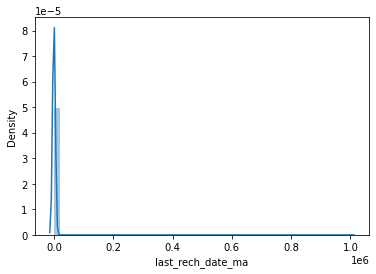

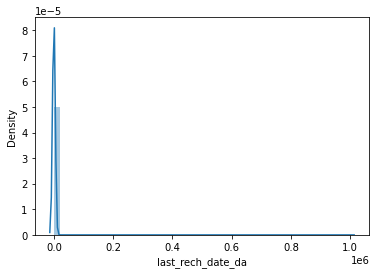

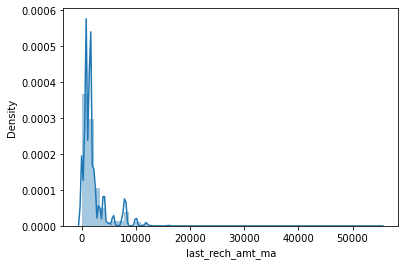

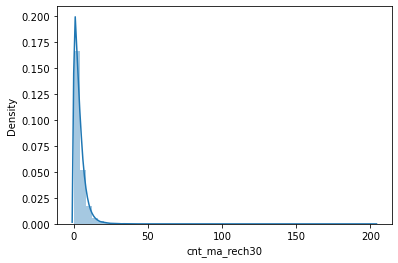

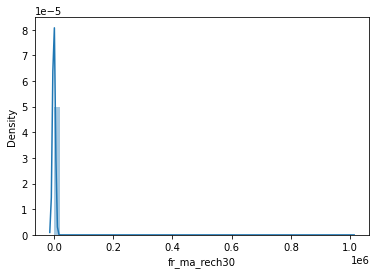

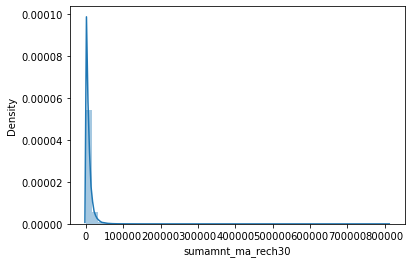

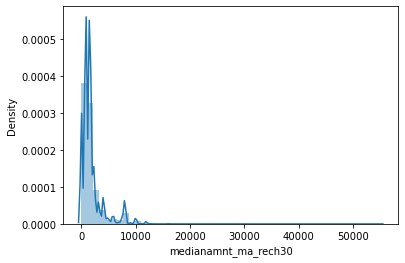

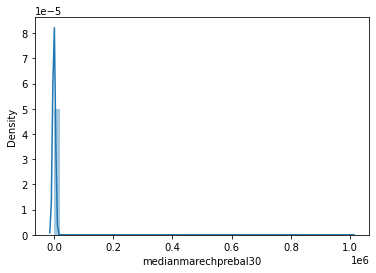

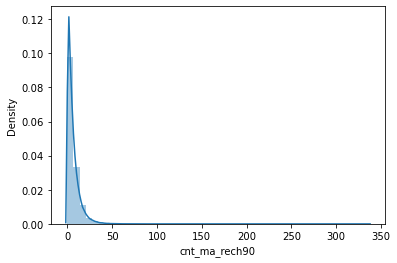

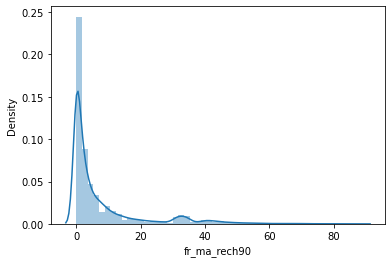

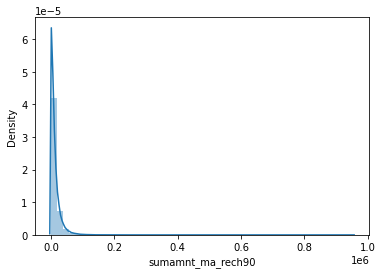

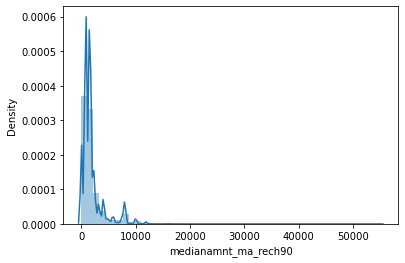

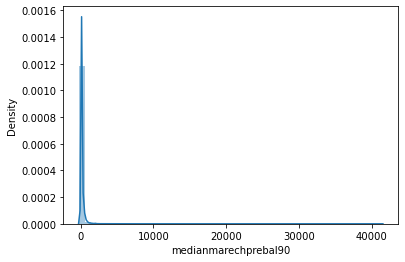

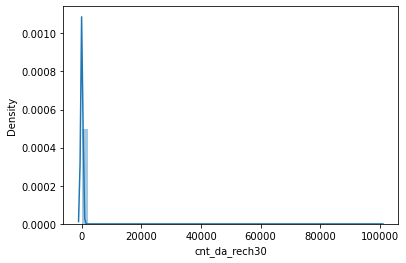

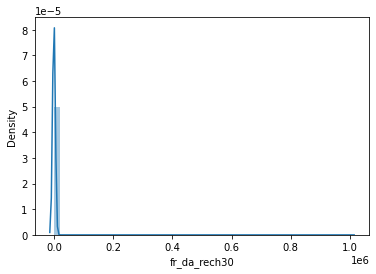

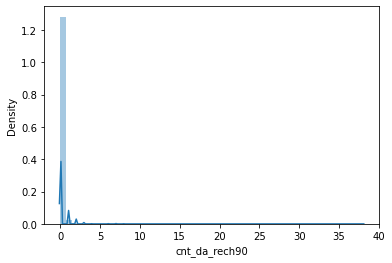

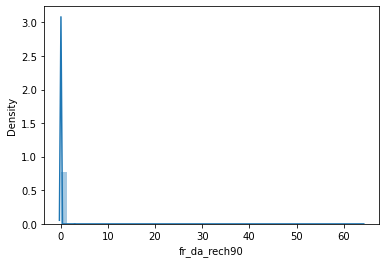

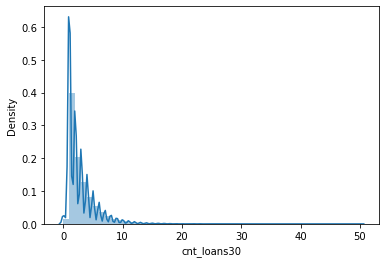

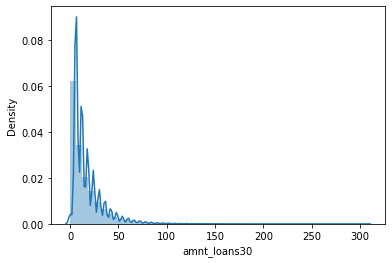

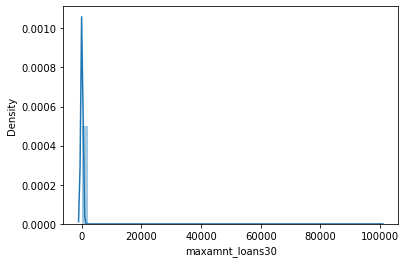

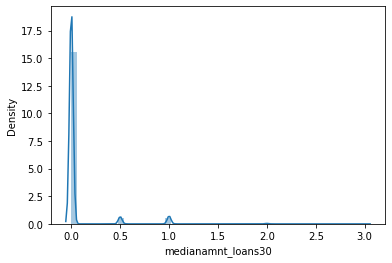

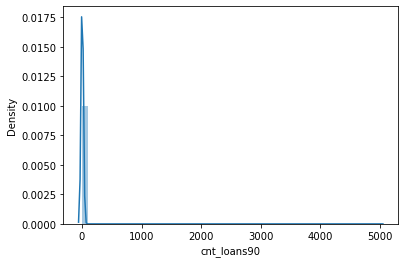

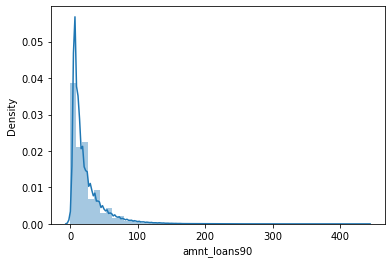

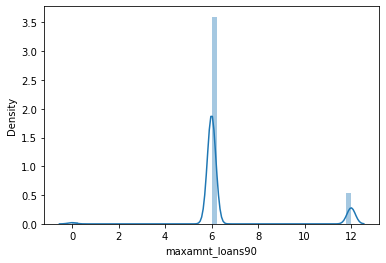

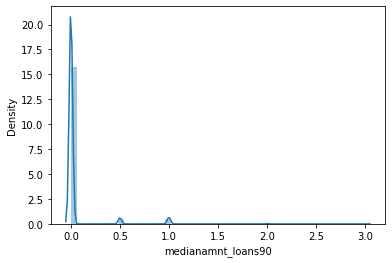

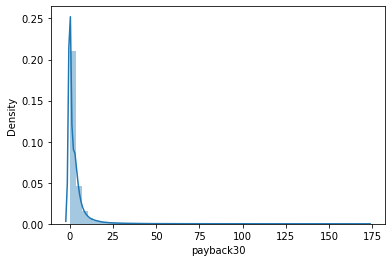

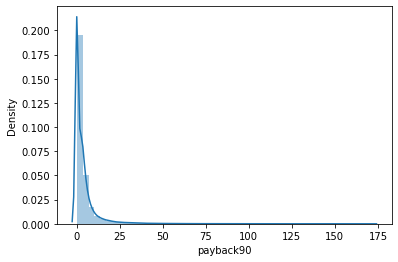

In [24]:
for i in df[c1]:
    plt.figure()
    sns.distplot(df[i])

--there is skewness present

In [25]:
year=df['pdate'].dt.year

In [26]:
month=df['pdate'].dt.month

In [27]:
day=df['pdate'].dt.day

In [28]:
df.drop('pdate',inplace=True,axis=1)

In [29]:
df['year']=year

In [30]:
df['month']=month

In [31]:
df['day']=day

model doesn't take string and date type data so we have to cnvert it into numeric data

In [32]:
df.head()

label       msisdn    aon  daily_decr30  daily_decr90  rental30  rental90  \
0      0  21408I70789  272.0   3055.050000   3065.150000    220.13    260.13   
1      1  76462I70374  712.0  12122.000000  12124.750000   3691.26   3691.26   
2      1  17943I70372  535.0   1398.000000   1398.000000    900.13    900.13   
3      1  55773I70781  241.0     21.228000     21.228000    159.42    159.42   
4      1  03813I82730  947.0    150.619333    150.619333   1098.90   1098.90   

   last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  ...  cnt_loans90  \
0                2.0                0.0              1539  ...          2.0   
1               20.0                0.0              5787  ...          1.0   
2                3.0                0.0              1539  ...          1.0   
3               41.0                0.0               947  ...          2.0   
4                4.0                0.0              2309  ...          7.0   

   amnt_loans90  maxamnt_loans90  medianamnt_loans90  payback30  payback90  \
0            12                6                 0.0  29.000000  29.000000   
1            12               12                 0.0   0.000000   0.000000   
2             6                6                 0.0   0.000000   0.000000   
3            12                6                 0.0   0.000000   0.000000   
4            42                6                 0.0   2.333333   2.333333   

   pcircle  year  month  day  
0      UPW  2016      7   20  
1      UPW  2016      8   10  
2      UPW  2016      8   19  
3      UPW  2016      6    6  
4      UPW  2016      6   22  

[5 rows x 38 columns]

In [33]:
df['pcircle'].value_counts()

UPW    209593
Name: pcircle, dtype: int64

In [34]:
df.drop('pcircle',inplace=True,axis=1)

In [35]:
df.skew()

label                   -2.270254
aon                     10.392949
daily_decr30             3.946230
daily_decr90             4.252565
rental30                 4.521929
rental90                 4.437681
last_rech_date_ma       14.790974
last_rech_date_da       14.814857
last_rech_amt_ma         3.781149
cnt_ma_rech30            3.283842
fr_ma_rech30            14.772833
sumamnt_ma_rech30        6.386787
medianamnt_ma_rech30     3.512324
medianmarechprebal30    14.779875
cnt_ma_rech90            3.425254
fr_ma_rech90             2.285423
sumamnt_ma_rech90        4.897950
medianamnt_ma_rech90     3.752706
medianmarechprebal90    44.880503
cnt_da_rech30           17.818364
fr_da_rech30            14.776430
cnt_da_rech90           27.267278
fr_da_rech90            28.988083
cnt_loans30              2.713421
amnt_loans30             2.975719
maxamnt_loans30         17.658052
medianamnt_loans30       4.551043
cnt_loans90             16.594408
amnt_loans90             3.150006
maxamnt_loans9

In [36]:
from scipy.stats import zscore

In [37]:
z=np.abs(zscore(df.iloc[:,2:16]))

In [38]:
z

array([[0.10357685, 0.25229941, 0.27634619, ..., 0.13222429, 0.07118488,
        0.59991084],
       [0.09776412, 0.73103667, 0.5533797 , ..., 1.9190977 , 0.07019351,
        0.73892613],
       [0.10010243, 0.43201111, 0.42903256, ..., 0.13222429, 0.07009574,
        0.73892613],
       ...,
       [0.09378769, 0.70079045, 0.53319431, ..., 0.13222429, 0.07037701,
        0.65122684],
       [0.08428915, 0.77075515, 0.59455827, ..., 0.50211898, 0.06828706,
        0.04384965],
       [0.08628398, 0.09674426, 0.14174607, ..., 1.31331064, 0.06471896,
        0.46089554]])

In [39]:
threshold=3
print(np.where(z>3))

(array([    30,     36,     36, ..., 209580, 209580, 209581], dtype=int64), array([ 5,  1,  2, ...,  7, 11,  2], dtype=int64))


In [40]:
ds1=df[(z<3).all(axis=1)]

In [41]:
ds1.shape 

(185557, 37)

In [42]:
ds1.head()

label       msisdn    aon  daily_decr30  daily_decr90  rental30  rental90  \
0      0  21408I70789  272.0   3055.050000   3065.150000    220.13    260.13   
1      1  76462I70374  712.0  12122.000000  12124.750000   3691.26   3691.26   
2      1  17943I70372  535.0   1398.000000   1398.000000    900.13    900.13   
3      1  55773I70781  241.0     21.228000     21.228000    159.42    159.42   
4      1  03813I82730  947.0    150.619333    150.619333   1098.90   1098.90   

   last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  ...  \
0                2.0                0.0              1539  ...   
1               20.0                0.0              5787  ...   
2                3.0                0.0              1539  ...   
3               41.0                0.0               947  ...   
4                4.0                0.0              2309  ...   

   medianamnt_loans30  cnt_loans90  amnt_loans90  maxamnt_loans90  \
0                 0.0          2.0            12                6   
1                 0.0          1.0            12               12   
2                 0.0          1.0             6                6   
3                 0.0          2.0            12                6   
4                 0.0          7.0            42                6   

   medianamnt_loans90  payback30  payback90  year  month  day  
0                 0.0  29.000000  29.000000  2016      7   20  
1                 0.0   0.000000   0.000000  2016      8   10  
2                 0.0   0.000000   0.000000  2016      8   19  
3                 0.0   0.000000   0.000000  2016      6    6  
4                 0.0   2.333333   2.333333  2016      6   22  

[5 rows x 37 columns]

In [43]:
df.shape

(209593, 37)

In [44]:
ds1.shape

(185557, 37)

we have removed outliers using zscore

In [45]:
df=ds1

In [46]:
df.head()

label       msisdn    aon  daily_decr30  daily_decr90  rental30  rental90  \
0      0  21408I70789  272.0   3055.050000   3065.150000    220.13    260.13   
1      1  76462I70374  712.0  12122.000000  12124.750000   3691.26   3691.26   
2      1  17943I70372  535.0   1398.000000   1398.000000    900.13    900.13   
3      1  55773I70781  241.0     21.228000     21.228000    159.42    159.42   
4      1  03813I82730  947.0    150.619333    150.619333   1098.90   1098.90   

   last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  ...  \
0                2.0                0.0              1539  ...   
1               20.0                0.0              5787  ...   
2                3.0                0.0              1539  ...   
3               41.0                0.0               947  ...   
4                4.0                0.0              2309  ...   

   medianamnt_loans30  cnt_loans90  amnt_loans90  maxamnt_loans90  \
0                 0.0          2.0            12                6   
1                 0.0          1.0            12               12   
2                 0.0          1.0             6                6   
3                 0.0          2.0            12                6   
4                 0.0          7.0            42                6   

   medianamnt_loans90  payback30  payback90  year  month  day  
0                 0.0  29.000000  29.000000  2016      7   20  
1                 0.0   0.000000   0.000000  2016      8   10  
2                 0.0   0.000000   0.000000  2016      8   19  
3                 0.0   0.000000   0.000000  2016      6    6  
4                 0.0   2.333333   2.333333  2016      6   22  

[5 rows x 37 columns]

In [47]:
df.skew()

label                   -2.162445
aon                      0.954525
daily_decr30             1.940378
daily_decr90             2.050730
rental30                 2.130040
rental90                 2.169171
last_rech_date_ma        3.068673
last_rech_date_da        9.619529
last_rech_amt_ma         2.097884
cnt_ma_rech30            1.269516
fr_ma_rech30             1.990418
sumamnt_ma_rech30        1.645626
medianamnt_ma_rech30     2.297971
medianmarechprebal30    16.091298
cnt_ma_rech90            1.413802
fr_ma_rech90             2.224183
sumamnt_ma_rech90        1.936406
medianamnt_ma_rech90     2.401009
medianmarechprebal90    45.540982
cnt_da_rech30           17.595565
fr_da_rech30            14.674955
cnt_da_rech90           24.031957
fr_da_rech90            29.679895
cnt_loans30              1.855630
amnt_loans30             1.967742
maxamnt_loans30         17.684542
medianamnt_loans30       4.517908
cnt_loans90             16.554042
amnt_loans90             2.176604
maxamnt_loans9

In [48]:
df.head()

label       msisdn    aon  daily_decr30  daily_decr90  rental30  rental90  \
0      0  21408I70789  272.0   3055.050000   3065.150000    220.13    260.13   
1      1  76462I70374  712.0  12122.000000  12124.750000   3691.26   3691.26   
2      1  17943I70372  535.0   1398.000000   1398.000000    900.13    900.13   
3      1  55773I70781  241.0     21.228000     21.228000    159.42    159.42   
4      1  03813I82730  947.0    150.619333    150.619333   1098.90   1098.90   

   last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  ...  \
0                2.0                0.0              1539  ...   
1               20.0                0.0              5787  ...   
2                3.0                0.0              1539  ...   
3               41.0                0.0               947  ...   
4                4.0                0.0              2309  ...   

   medianamnt_loans30  cnt_loans90  amnt_loans90  maxamnt_loans90  \
0                 0.0          2.0            12                6   
1                 0.0          1.0            12               12   
2                 0.0          1.0             6                6   
3                 0.0          2.0            12                6   
4                 0.0          7.0            42                6   

   medianamnt_loans90  payback30  payback90  year  month  day  
0                 0.0  29.000000  29.000000  2016      7   20  
1                 0.0   0.000000   0.000000  2016      8   10  
2                 0.0   0.000000   0.000000  2016      8   19  
3                 0.0   0.000000   0.000000  2016      6    6  
4                 0.0   2.333333   2.333333  2016      6   22  

[5 rows x 37 columns]

In [49]:
df2=df

In [50]:
x=df.iloc[:,1:]

In [51]:
x.head()

msisdn    aon  daily_decr30  daily_decr90  rental30  rental90  \
0  21408I70789  272.0   3055.050000   3065.150000    220.13    260.13   
1  76462I70374  712.0  12122.000000  12124.750000   3691.26   3691.26   
2  17943I70372  535.0   1398.000000   1398.000000    900.13    900.13   
3  55773I70781  241.0     21.228000     21.228000    159.42    159.42   
4  03813I82730  947.0    150.619333    150.619333   1098.90   1098.90   

   last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  ...  \
0                2.0                0.0              1539              2  ...   
1               20.0                0.0              5787              1  ...   
2                3.0                0.0              1539              1  ...   
3               41.0                0.0               947              0  ...   
4                4.0                0.0              2309              7  ...   

   medianamnt_loans30  cnt_loans90  amnt_loans90  maxamnt_loans90  \
0                 0.0          2.0            12                6   
1                 0.0          1.0            12               12   
2                 0.0          1.0             6                6   
3                 0.0          2.0            12                6   
4                 0.0          7.0            42                6   

   medianamnt_loans90  payback30  payback90  year  month  day  
0                 0.0  29.000000  29.000000  2016      7   20  
1                 0.0   0.000000   0.000000  2016      8   10  
2                 0.0   0.000000   0.000000  2016      8   19  
3                 0.0   0.000000   0.000000  2016      6    6  
4                 0.0   2.333333   2.333333  2016      6   22  

[5 rows x 36 columns]

In [52]:
y=df.iloc[:,0]

In [53]:
y.head()

0    0
1    1
2    1
3    1
4    1
Name: label, dtype: int64

In [54]:
from imblearn.over_sampling import SMOTE

In [55]:
sm=SMOTE()

In [56]:
x1=x.drop('msisdn',axis=1)

In [57]:
x_1,y_1=sm.fit_resample(x1,y)

In [58]:
y_1.value_counts()

1    160891
0    160891
Name: label, dtype: int64

we solved the class imbalance problem using oversampling

In [87]:
x_train,x_test,y_train,y_test=train_test_split(x_1,y_1,test_size=.30,random_state=300)

In [88]:
x_train.shape

(225247, 35)

In [89]:
y_train.shape

(225247,)

In [90]:
x_test.shape

(96535, 35)

In [91]:
y_test.shape

(96535,)

In [92]:
lg=LogisticRegression()

gnb=GaussianNB()
dtc=DecisionTreeClassifier()

In [93]:
lg.fit(x_train,y_train)
lpred=lg.predict(x_test)
print(accuracy_score(y_test,lpred))

0.7453048117263169


In [94]:
print(confusion_matrix(y_test,lpred))

[[40964  7258]
 [17329 30984]]


In [95]:
print(classification_report(y_test,lpred))

              precision    recall  f1-score   support

           0       0.70      0.85      0.77     48222
           1       0.81      0.64      0.72     48313

    accuracy                           0.75     96535
   macro avg       0.76      0.75      0.74     96535
weighted avg       0.76      0.75      0.74     96535



In [96]:
gnb.fit(x_train,y_train)
gfit=gnb.predict(x_test)


In [97]:
print(accuracy_score(y_test,gfit))

0.7045423939503807


In [98]:
print(confusion_matrix(y_test,gfit))

[[42995  5227]
 [23295 25018]]


In [99]:
print(classification_report(y_test,gfit))

              precision    recall  f1-score   support

           0       0.65      0.89      0.75     48222
           1       0.83      0.52      0.64     48313

    accuracy                           0.70     96535
   macro avg       0.74      0.70      0.69     96535
weighted avg       0.74      0.70      0.69     96535



In [100]:
dtc.fit(x_train,y_train)
dpred=dtc.predict(x_test)

In [101]:
print(accuracy_score(y_test,dpred))

0.9035790127932875


In [103]:
print(classification_report(y_test,dpred))

              precision    recall  f1-score   support

           0       0.90      0.91      0.90     48222
           1       0.91      0.90      0.90     48313

    accuracy                           0.90     96535
   macro avg       0.90      0.90      0.90     96535
weighted avg       0.90      0.90      0.90     96535



In [104]:
print(confusion_matrix(y_test,dpred))

[[43906  4316]
 [ 4992 43321]]


In [110]:
from sklearn.ensemble import AdaBoostClassifier

In [111]:
ad=AdaBoostClassifier(n_estimators=200)

In [112]:
ad.fit(x_train,y_train)

AdaBoostClassifier(n_estimators=200)

In [113]:
adpred=ad.predict(x_test)

In [114]:
print(accuracy_score(y_test,adpred))

0.8954886828611385


In [115]:
print(confusion_matrix(y_test,adpred))

[[43690  4532]
 [ 5557 42756]]


In [116]:
print(classification_report(y_test,adpred))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90     48222
           1       0.90      0.88      0.89     48313

    accuracy                           0.90     96535
   macro avg       0.90      0.90      0.90     96535
weighted avg       0.90      0.90      0.90     96535



In [117]:
from sklearn.ensemble import RandomForestClassifier

In [118]:
rf=RandomForestClassifier(n_estimators=100)


In [119]:
rf.fit(x_train,y_train)
rfpred=rf.predict(x_test)

In [120]:
print(accuracy_score(y_test,rfpred))

0.9449318899880872


In [121]:
print(classification_report(y_test,rfpred))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94     48222
           1       0.94      0.95      0.95     48313

    accuracy                           0.94     96535
   macro avg       0.94      0.94      0.94     96535
weighted avg       0.94      0.94      0.94     96535



In [122]:
print(confusion_matrix(y_test,rfpred))

[[45311  2911]
 [ 2405 45908]]


In [124]:
score=cross_val_score(gnb,x_1,y_1,cv=5)
print(score)
print(score.mean())

[0.69871187 0.70840779 0.70890049 0.71001927 0.70785941]
0.7067797653065429


In [125]:
score=cross_val_score(lg,x_1,y_1,cv=5)
print(score)
print(score.mean())

[0.74419255 0.74928912 0.74829076 0.74886568 0.74883461]
0.74789454446618


In [126]:
score=cross_val_score(dtc,x_1,y_1,cv=5)
print(score)
print(score.mean())

[0.81392855 0.920941   0.9211107  0.92067562 0.92047362]
0.8994258969806831


In [128]:
score=cross_val_score(ad,x_1,y_1,cv=5)
print(score)
print(score.mean())

[0.80469879 0.91228615 0.90871092 0.91219156 0.91304618]
0.8901867207876706


In [129]:
score=cross_val_score(rf,x_1,y_1,cv=5)
print(score)
print(score.mean()) 

[0.84080986 0.9665926  0.96368637 0.96590838 0.96544223]
0.9404878879903718


the best model is random forest classifier

In [130]:
joblib.dump(rf,'Micro_credit.obj')

['Micro_credit.obj']